In [108]:
import category_encoders as ce #pip install
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [3]:
dataset_df = pd.read_csv("/Users/ezi/Desktop/HomeVision/elasticsearch-seed.csv")

In [4]:
dataset_df

,NumberOfTanksAndPonds,ListingFinancing,AccessoryUnitType,AccessoryUnitYN,AcresBottomLand,AcresCultivated,AcresIrrigated,AcresPasture,AGExemptionYN,AppFeePayableTo,...,TitleCompanyLocation,TitleCompanyPhone,Topography,TransactionType,UnexemptTaxes,UnitNumber,Utilities,UtilitiesOther,VariableFeeYN,WasherDryerConnections
0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lewisville, TX",9722463400,NaN,For Sale,1449.0,NaN,"City Sewer, City Water, Community Mailbox, Con...",NaN,False,NaN
1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Lewisville,972-246-3450,NaN,For Sale,1760.0,NaN,"City Sewer, City Water, Community Mailbox, Con...",NaN,False,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,For Sale,NaN,NaN,"All Weather Road, City Sewer, City Water",NaN,False,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,For Sale,3119.0,NaN,"City Sewer, City Water",NaN,False,NaN
4,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,"7055 Preston Rd., Frisco TX",(972) 335-7844,NaN,For Sale,NaN,1503.0,"City Sewer, City Water, Community Mailbox, Con...",NaN,False,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7950 Legacy Drive - Plano,469-430-1701,NaN,For Sale,4231.0,NaN,"City Sewer, City Water",NaN,False,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,For Sale,3639.0,NaN,"Alley, City Sewer, City Water",NaN,False,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4611 Preston Rd, # 400, Frisco",972-377-8400,NaN,For Sale,5374.0,NaN,"City Sewer, City Water, Community Mailbox, Con...",NaN,False,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1700 Prosper Trail,9723471000,NaN,For Sale,4003.0,NaN,"All Weather Road, City Sewer, City Water, Conc...",NaN,False,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,For Sale/Lease,5793.0,NaN,"City Sewer, City Water",NaN,False,NaN


In [5]:
data_df = dataset_df[['ClosePrice',
'BathsTotal',
'BedsTotal',
'CDOM',
'LotSizeAreaSQFT',
'SqFtTotal',
'ElementarySchoolName']]

In [119]:
data_df

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName
0,NaN,2.1,3,111,4573.80,2460,Vaughn
1,NaN,4.1,4,2,5837.04,3418,Vaughn
2,NaN,5.2,5,70,34848.00,8093,Hicks
3,NaN,1.0,2,13,4356.00,1122,Rogers
4,NaN,1.1,1,10,1306.80,884,Bright
5,NaN,2.0,3,53,6534.00,1215,Rogers
6,NaN,2.0,3,15,6098.40,1282,Rogers
7,NaN,2.0,3,101,6098.40,1619,Christie
8,NaN,2.0,3,97,14810.40,1684,Rogers
9,NaN,2.1,3,3,5662.80,1726,Christie


In [6]:
dfNull, df1 = [x for _, x in data_df.groupby(data_df['ClosePrice'] > 0)]

In [7]:
df1

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName
430,485000.0,3.0,4,52,7100.28,2484,Allen
431,330000.0,2.1,4,58,8712.00,2631,Fisher
432,185000.0,1.1,1,38,1306.80,884,Bright
433,210000.0,2.0,3,11,6969.60,1451,Shawnee
434,225000.0,2.0,3,89,6098.40,1559,Bright
435,225000.0,2.1,2,10,2613.60,1014,Bright
436,231000.0,2.0,3,43,5662.80,1640,Tadlock
437,235000.0,2.0,3,107,6534.00,1321,Christie
438,240000.0,2.0,3,90,5662.80,1883,Tadlock
439,240000.0,2.0,4,9,6098.40,1796,Gunstream


In [8]:
df1.isnull().sum().sum()

0

In [9]:
df1.describe()

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.273260e+05,2.866368,3.829596,81.318386,7775.753004,2932.551570
std,1.973822e+05,0.882813,0.775540,87.717873,4160.052158,1084.846573
min,1.850000e+05,1.100000,1.000000,-62.000000,0.000000,884.000000
25%,3.000000e+05,2.000000,3.000000,14.500000,6098.400000,2062.500000
50%,3.730000e+05,3.000000,4.000000,53.000000,7405.200000,2760.000000
75%,4.805000e+05,3.200000,4.000000,117.000000,9125.820000,3610.000000
max,1.622500e+06,5.200000,5.000000,488.000000,40423.680000,7891.000000


In [10]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 430 to 652
Data columns (total 7 columns):
ClosePrice              223 non-null float64
BathsTotal              223 non-null float64
BedsTotal               223 non-null int64
CDOM                    223 non-null int64
LotSizeAreaSQFT         223 non-null float64
SqFtTotal               223 non-null int64
ElementarySchoolName    223 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 13.9+ KB
None


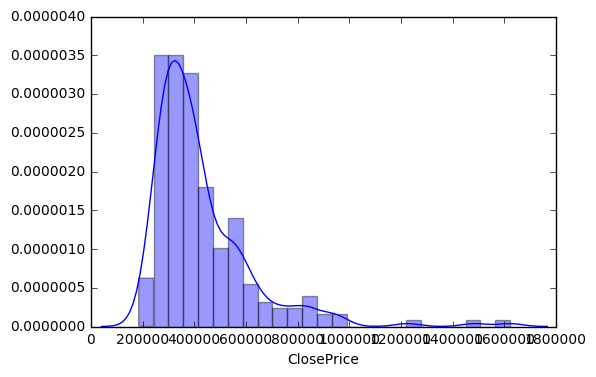

In [11]:
sns.distplot(df1['ClosePrice'])

## Finding Outliers

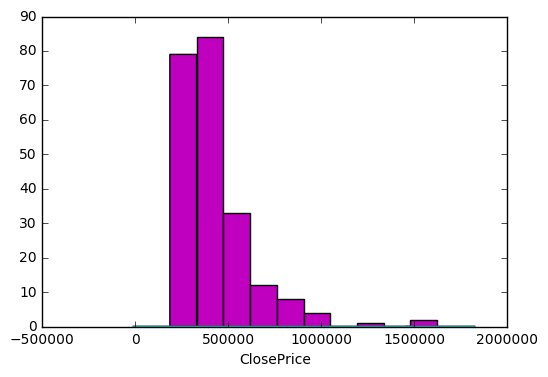

In [134]:
plt.hist(df1['ClosePrice'])
plt.show()

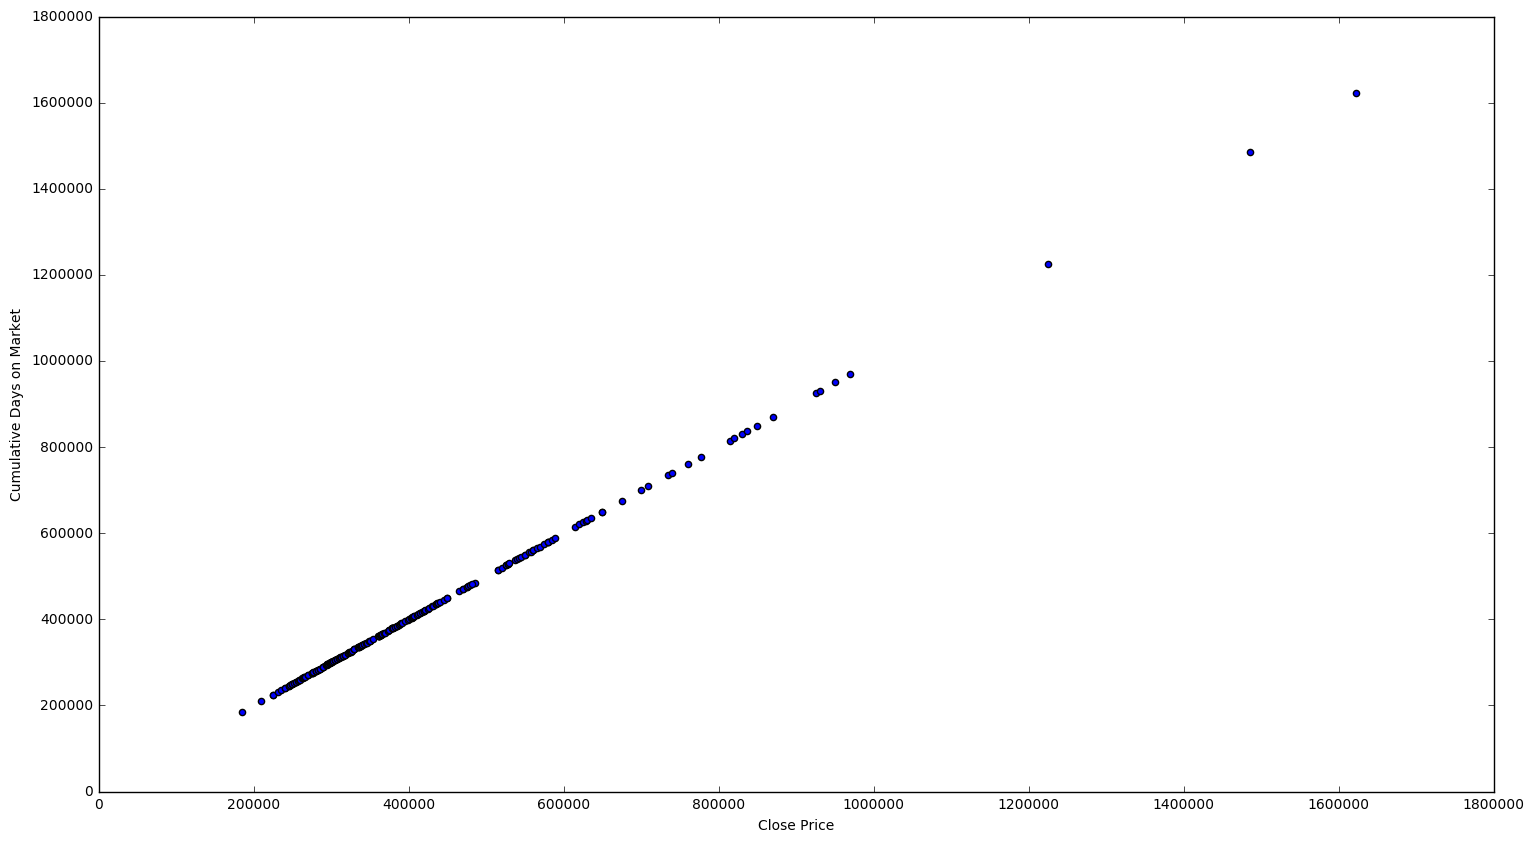

In [218]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['ClosePrice'], df1['ClosePrice'])
  
# x-axis label
ax.set_xlabel('Close Price')
  
# y-axis label
ax.set_ylabel('Cumulative Days on Market')
plt.show()

In [219]:
# Position of the Outlier
print(np.where((df1['ClosePrice']>1100000) & (df1['ClosePrice']>1100000)))

(array([220, 221, 222]),)


In [139]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['ClosePrice']))
print(z)

[2.92852199e-01 4.94193125e-01 1.23046133e+00 1.10351854e+00
 1.02735286e+00 1.02735286e+00 9.96886589e-01 9.76575742e-01
 9.51187183e-01 9.51187183e-01 9.25798624e-01 9.25798624e-01
 9.15643201e-01 9.00410066e-01 9.00410066e-01 9.00410066e-01
 8.90254642e-01 8.75275392e-01 8.75021507e-01 8.62327227e-01
 8.54710660e-01 8.49632948e-01 8.34399813e-01 8.29322101e-01
 8.24244389e-01 8.24244389e-01 8.19166677e-01 7.98855830e-01
 7.98855830e-01 7.73467271e-01 7.73467271e-01 7.73467271e-01
 7.68389560e-01 7.63311848e-01 7.48078713e-01 7.48078713e-01
 7.43001001e-01 7.35384433e-01 7.32845577e-01 7.22690154e-01
 7.22690154e-01 7.02379307e-01 6.97301595e-01 6.97301595e-01
 6.97301595e-01 6.97301595e-01 6.82068460e-01 6.72928579e-01
 6.71913036e-01 6.71913036e-01 6.69374180e-01 6.57812231e-01
 6.56679901e-01 6.51602189e-01 6.46529555e-01 6.46524477e-01
 6.46524477e-01 6.46524477e-01 6.46524477e-01 6.41446766e-01
 6.31291342e-01 6.21135919e-01 6.21135919e-01 6.21135919e-01
 6.10980495e-01 6.109804

In [140]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([220, 221, 222]),)


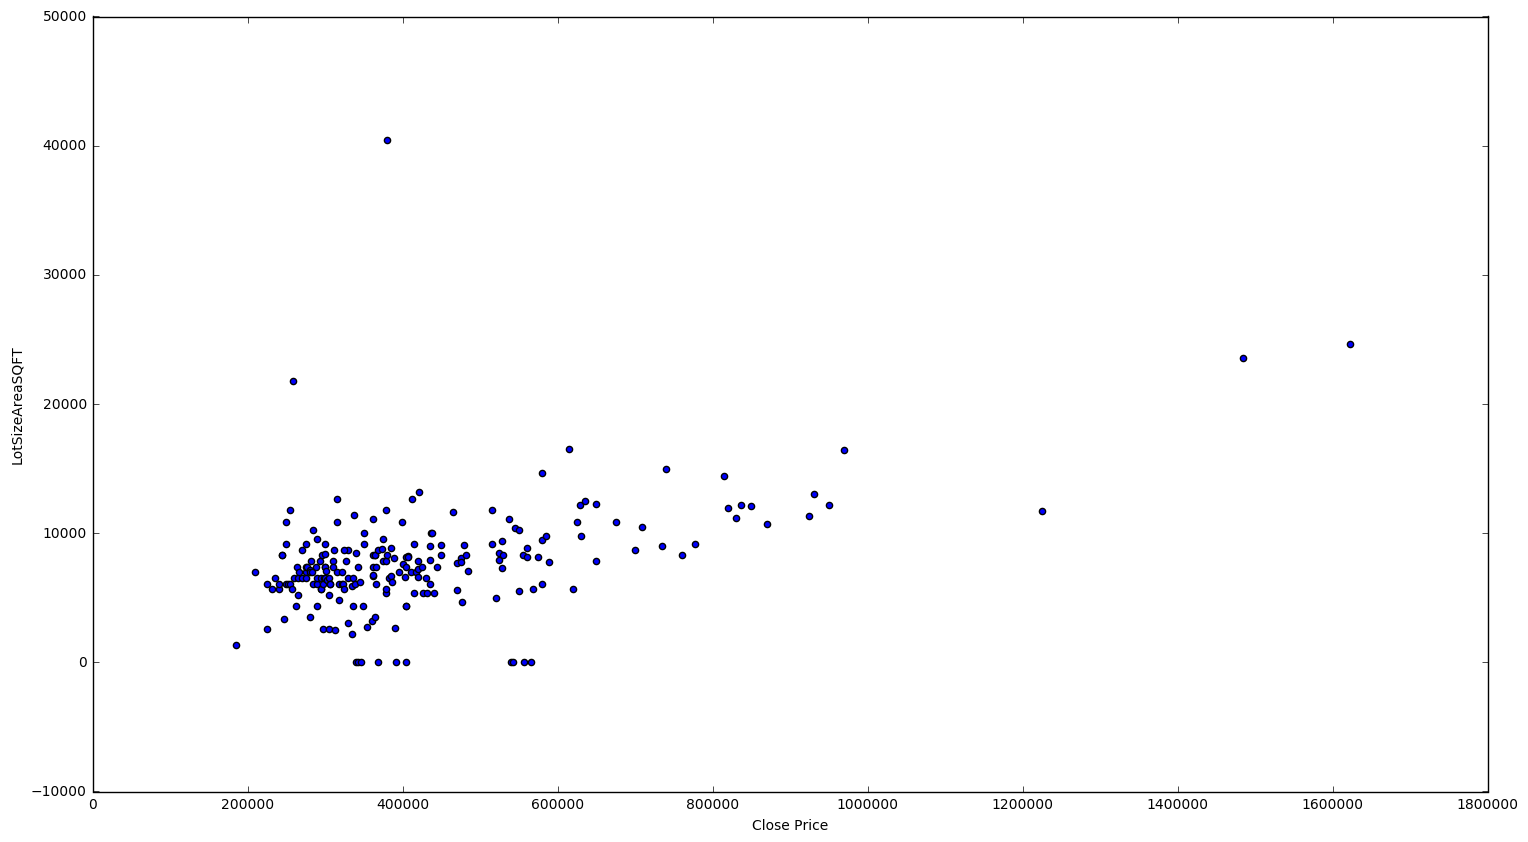

In [145]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['ClosePrice'], df1['LotSizeAreaSQFT'])
  
# x-axis label
ax.set_xlabel('Close Price')
  
# y-axis label
ax.set_ylabel('LotSizeAreaSQFT')
plt.show()

In [194]:
# Position of the Outlier
index_ls = list()
ls = list()
temp_ls = list()
arr1 = np.where((df1['ClosePrice']>1100000) & (df1['LotSizeAreaSQFT']>10000)) 
arr2= np.where((df1['ClosePrice']<600000) & (df1['LotSizeAreaSQFT']>20000))

arrt = arr1+arr2
#total_ls = arr2.tolist()
ls = np.array(arrt).tolist()
print(ls)

[array([220, 221, 222]), array([ 20, 120])]


In [142]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['LotSizeAreaSQFT']))
print(z)

[1.62736573e-01 2.25562867e-01 1.55851564e+00 1.94220311e-01
 4.04111900e-01 1.24367826e+00 5.09057695e-01 2.99166106e-01
 5.09057695e-01 4.04111900e-01 1.20617072e-01 1.20617072e-01
 1.06527041e+00 4.04111900e-01 3.30508661e-01 7.50291839e-01
 4.04111900e-01 4.04111900e-01 9.60183428e-01 5.09057695e-01
 3.37393670e+00 2.99166106e-01 8.23895078e-01 8.92745166e-02
 6.14003489e-01 2.99166106e-01 1.94220311e-01 2.25562867e-01
 2.99166106e-01 1.94220311e-01 3.30508661e-01 8.92745166e-02
 2.99166106e-01 8.92745166e-02 1.52241993e-01 1.94220311e-01
 1.03378667e+00 1.56712778e-02 1.94220311e-01 4.04111900e-01
 5.92873147e-01 8.92745166e-02 4.24959876e-01 4.04111900e-01
 2.99166106e-01 8.23895078e-01 1.56712778e-02 5.09057695e-01
 5.09057695e-01 2.99166106e-01 1.20617072e-01 1.24367826e+00
 4.04111900e-01 2.99166106e-01 2.99166106e-01 3.30508661e-01
 8.92745166e-02 1.41606231e-01 8.92745166e-02 1.62736573e-01
 3.30649844e-01 2.99166106e-01 6.14003489e-01 1.24367826e+00
 4.04111900e-01 4.041119

In [143]:
threshold = 3
  
# Position of the outlier
print(np.where(z > 3))

(array([ 20, 120, 221, 222]),)


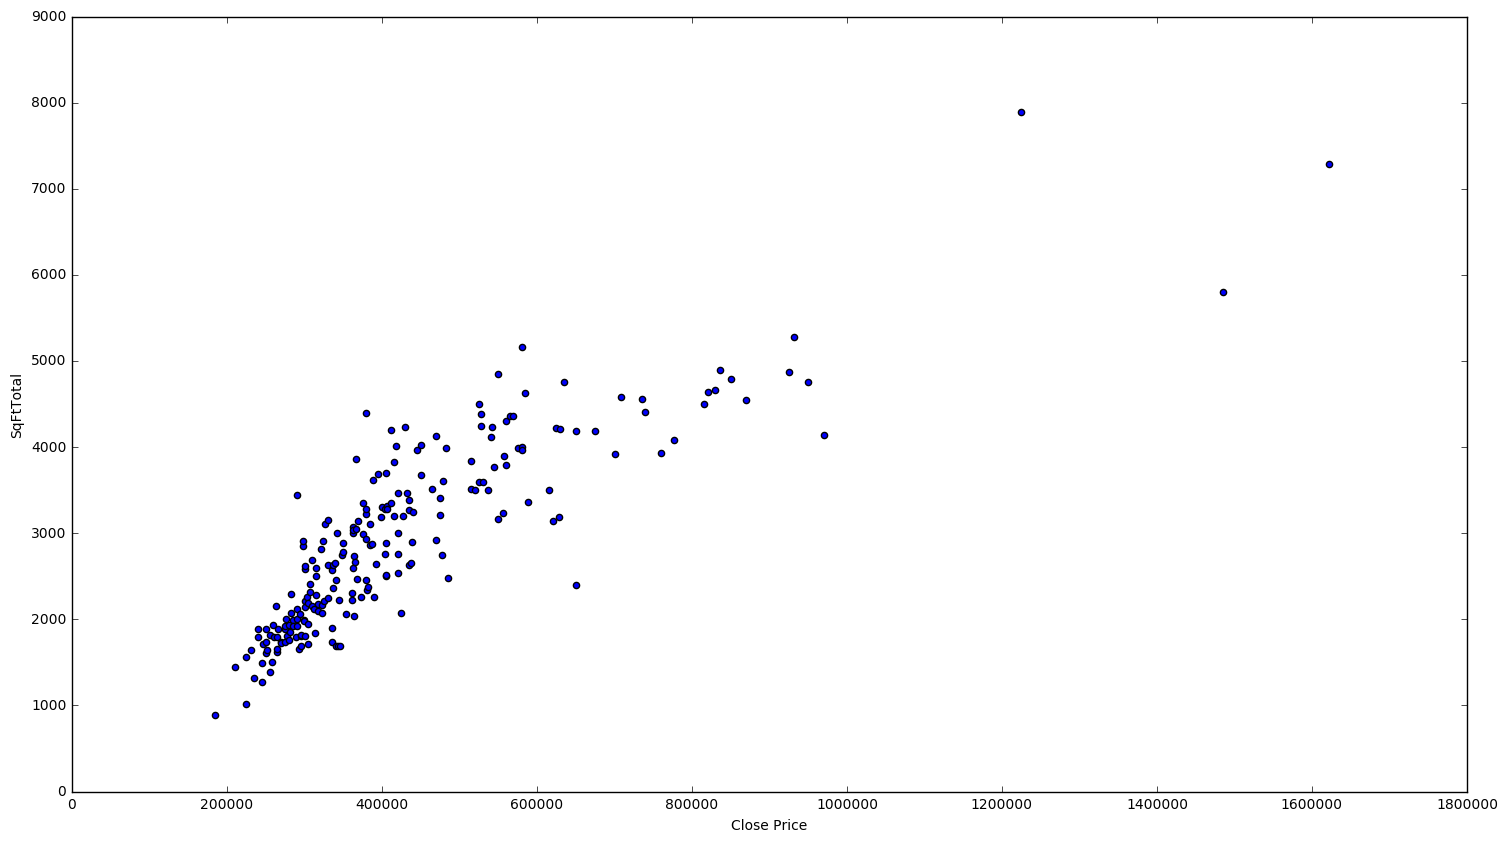

In [196]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['ClosePrice'], df1['SqFtTotal'])
  
# x-axis label
ax.set_xlabel('Close Price')
  
# y-axis label
ax.set_ylabel('SqFtTotal')
plt.show()

In [200]:
arr1 = np.where((df1['ClosePrice']>1100000) & (df1['SqFtTotal']>5500))
print(arr1)

(array([220, 221, 222]),)


In [197]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['SqFtTotal']))
print(z)

[4.14400245e-01 2.78592369e-01 1.89258121e+00 1.36875083e+00
 1.26897362e+00 1.77247901e+00 1.19414070e+00 1.48885303e+00
 9.69641970e-01 1.05001806e+00 1.33272017e+00 1.53504619e+00
 1.12207938e+00 9.69641970e-01 1.10452598e+00 1.22000887e+00
 1.19414070e+00 1.42418262e+00 1.03523625e+00 1.32070995e+00
 9.25296541e-01 1.05001806e+00 7.15579617e-01 1.21169410e+00
 1.05371351e+00 1.17566344e+00 9.69641970e-01 1.10452598e+00
 1.12115552e+00 9.69641970e-01 1.10544985e+00 9.36382899e-01
 8.57854535e-01 1.03985557e+00 9.24372678e-01 1.07865782e+00
 9.96434000e-01 7.96879570e-01 5.95477413e-01 8.66169303e-01
 9.36382899e-01 1.05648510e+00 9.36382899e-01 4.73432197e-01
 7.50686415e-01 8.57854535e-01 1.17566344e+00 8.02422749e-01
 1.15256686e+00 1.04539874e+00 1.02969307e+00 7.25708968e-02
 2.45300154e-02 8.66169303e-01 8.80027249e-01 6.65691009e-01
 1.04262716e+00 3.26633250e-01 2.95221905e-01 7.29437563e-01
 6.21345580e-01 6.89711450e-01 1.12669870e+00 9.13286321e-01
 4.87385430e-01 5.677615

In [198]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([220, 222]),)


In [166]:
df1.shape

(223, 7)

## Remove outliers

In [162]:
# define function called "outliers", which returns a lisy of index of outliers 
# IQR = Q3 - Q1
# +/- 1.5 * IQR
def outliers(df, ft): #the dataframe and the feature
    
    # calculate the qunautile and the third quantile. To do so w
    Q1 =df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    
    # get Interquartile range
    IQR = Q3 - Q1
    
    # set lower boundary and upper boundary
    #lower boundary: subratct Q1 from 1.5*IQR
    # upper boundry: addition of the 1..5*IQR
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    
    # create a list to store indexes of the outliers
    # extract the indexes usign the index function in pandas
    # condation 1.) any value smaller than that the lower bound.
    # condtion  2.) any value larger than the upper bound
    # if returns true --> it is an outlier 
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls
    
    
        

In [163]:
# create an empty list to store the output indices from multiple coulmns

index_list = []

# extract outliers
for feature in ['ClosePrice', 'LotSizeAreaSQFT']:
    # want to save the output indexes in the same list, using the python extend function
    index_list.extend(outliers(df1, feature))


In [164]:
index_list

[430,
 431,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597

In [165]:
#define a function called "remove" which returns a clenead datatfremae without the outliers 
# parameters: dtaat frame and index list
def remove(df, ls):
    ls = sorted(set(ls))  # index list might not be unquie
    df = df.drop(ls)
    
    return df

In [195]:
df_cleaned = remove(df1, ls)

TypeError: unhashable type: 'numpy.ndarray'

In [12]:
df_cleaned.shape

NameError: name 'df_cleaned' is not defined

## Multicollinearity for feature correalation 

In [13]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

NameError: name 'plt' is not defined

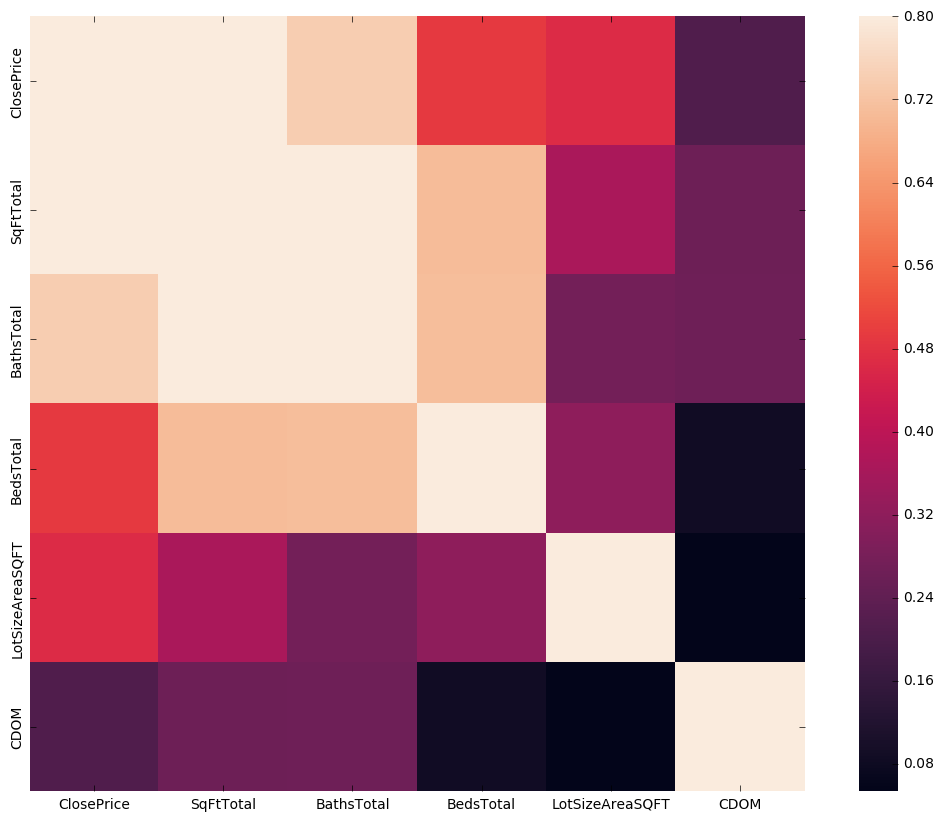

In [202]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ClosePrice')['ClosePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df1[cols].corr(), vmax=.8, square=True);

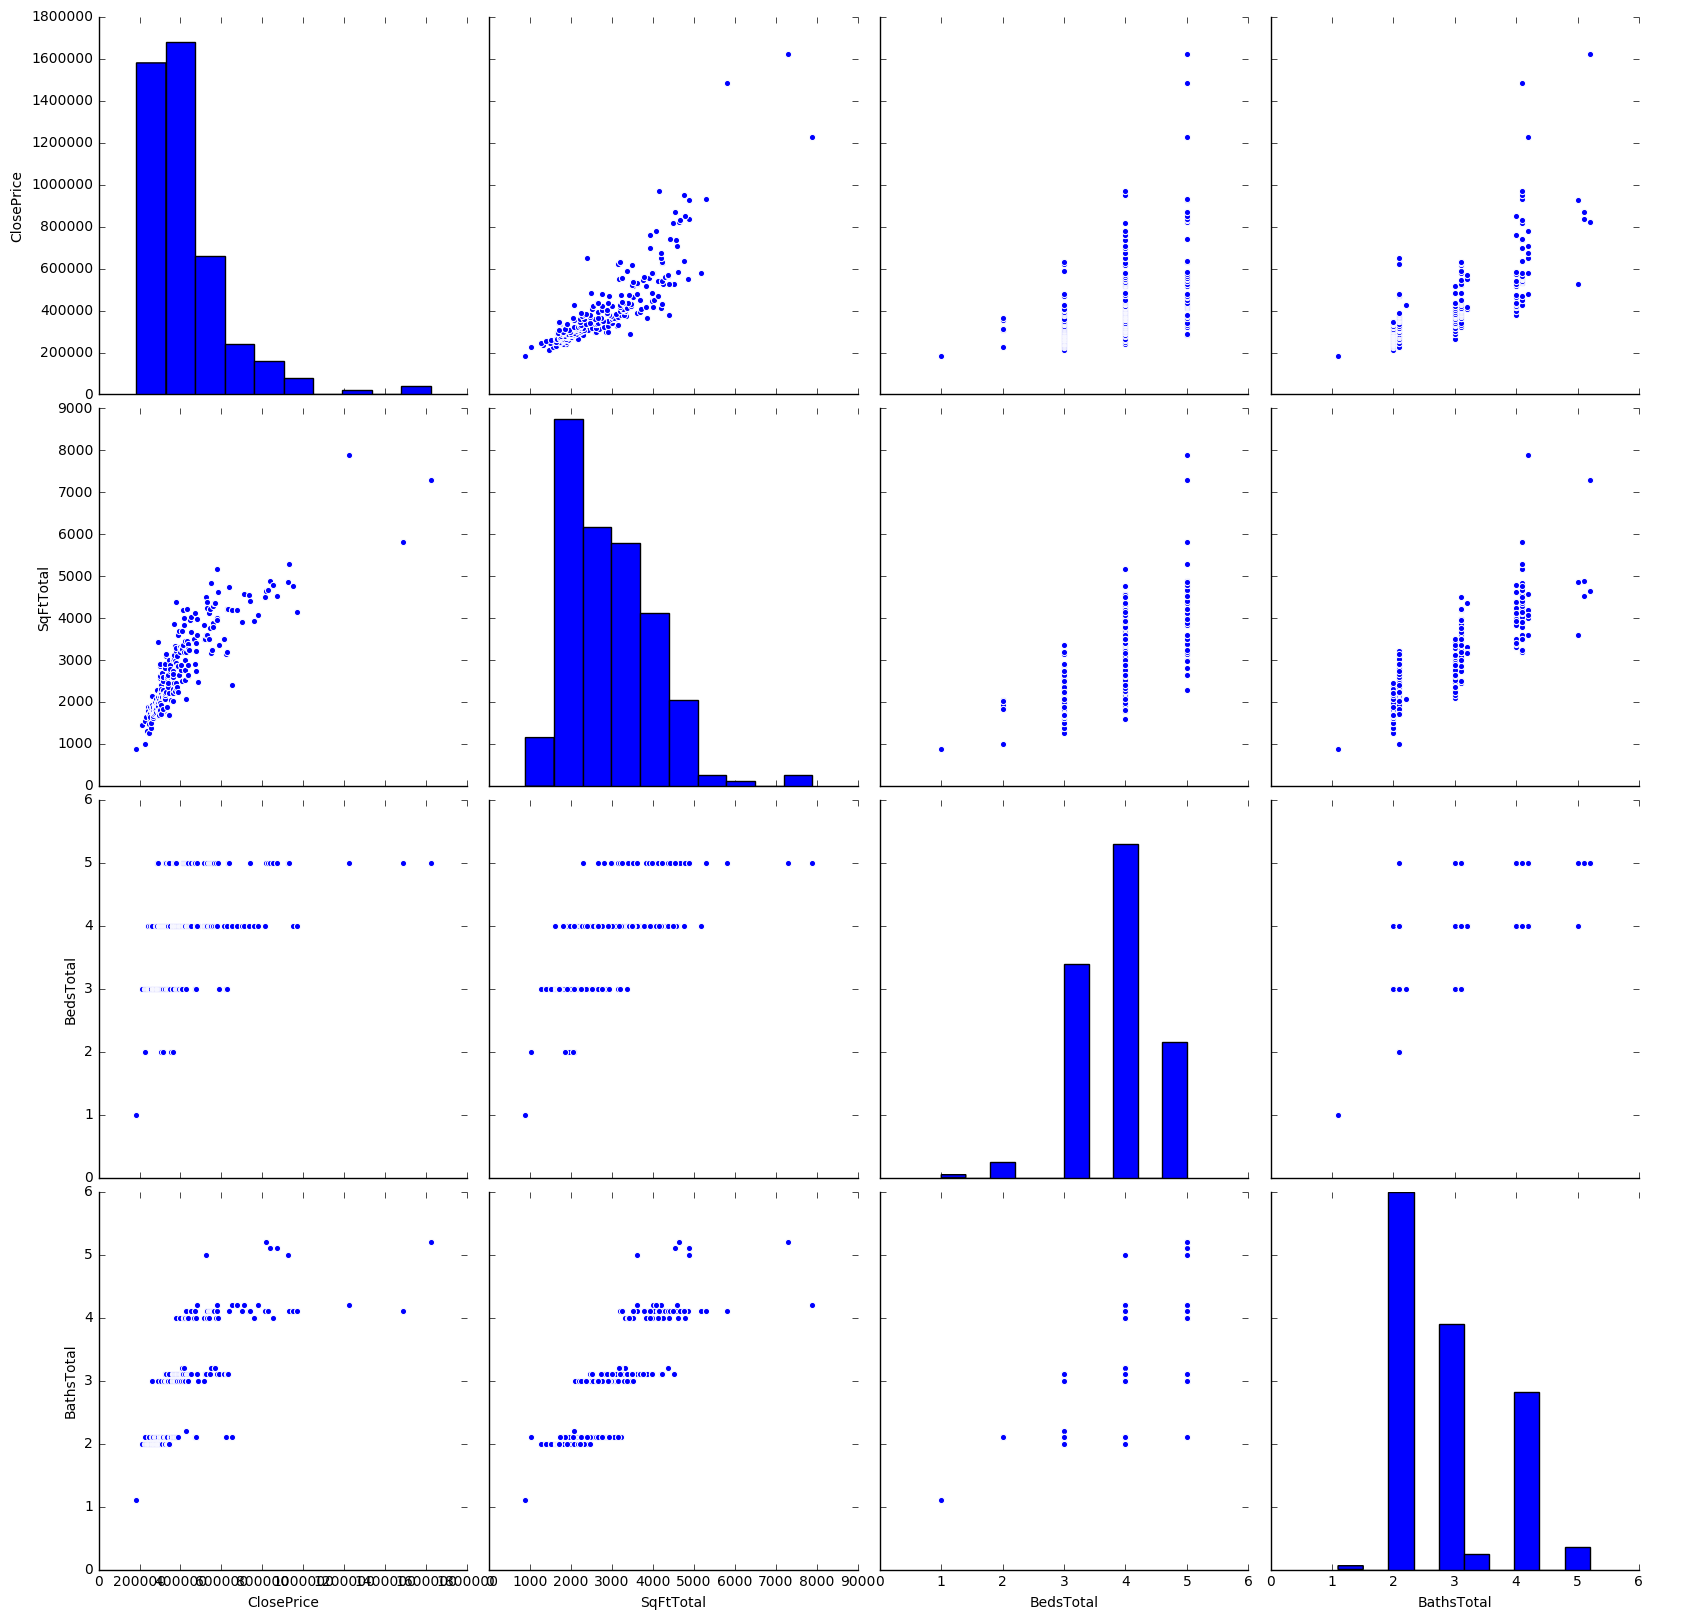

In [14]:
cols = ['ClosePrice', 'SqFtTotal', 'BedsTotal', 'BathsTotal']
sns.pairplot(df1[cols], height = 4);

In [15]:
df1['ElementarySchoolName'].value_counts()

Rogers                   31
Vaughn                   25
Bright                   25
Tadlock                  18
Gunstream                15
Pink                     14
Christie                 14
Carroll                  12
Newman                   11
Spears                   10
Jim Spradley              9
Sem                       9
Shawnee                   7
Purefoy                   6
Fisher                    6
Judy Rucker               4
Sparks                    2
Liscano                   1
Allen                     1
Nichols                   1
Lucille Rogers Ashley     1
Elliott                   1
Name: ElementarySchoolName, dtype: int64

In [124]:
#Create object for binary encoding
encoder = ce.BinaryEncoder(cols=['ElementarySchoolName'])
dftemp = encoder.fit_transform(df1['ElementarySchoolName'])
df1 = pd.concat([df1, dftemp], axis=1)

#Original Data
#data

In [18]:
df1

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,Allen,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,Fisher,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,Bright,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,Shawnee,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,Bright,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,Bright,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,Tadlock,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,Christie,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,Tadlock,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,Gunstream,0,0,0,1,1,1


In [19]:
df1.describe()

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.273260e+05,2.866368,3.829596,81.318386,7775.753004,2932.551570,0.0,0.291480,0.322870,0.354260,0.488789,0.511211
std,1.973822e+05,0.882813,0.775540,87.717873,4160.052158,1084.846573,0.0,0.455466,0.468625,0.479365,0.500999,0.500999
min,1.850000e+05,1.100000,1.000000,-62.000000,0.000000,884.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+05,2.000000,3.000000,14.500000,6098.400000,2062.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.730000e+05,3.000000,4.000000,53.000000,7405.200000,2760.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.805000e+05,3.200000,4.000000,117.000000,9125.820000,3610.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.622500e+06,5.200000,5.000000,488.000000,40423.680000,7891.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


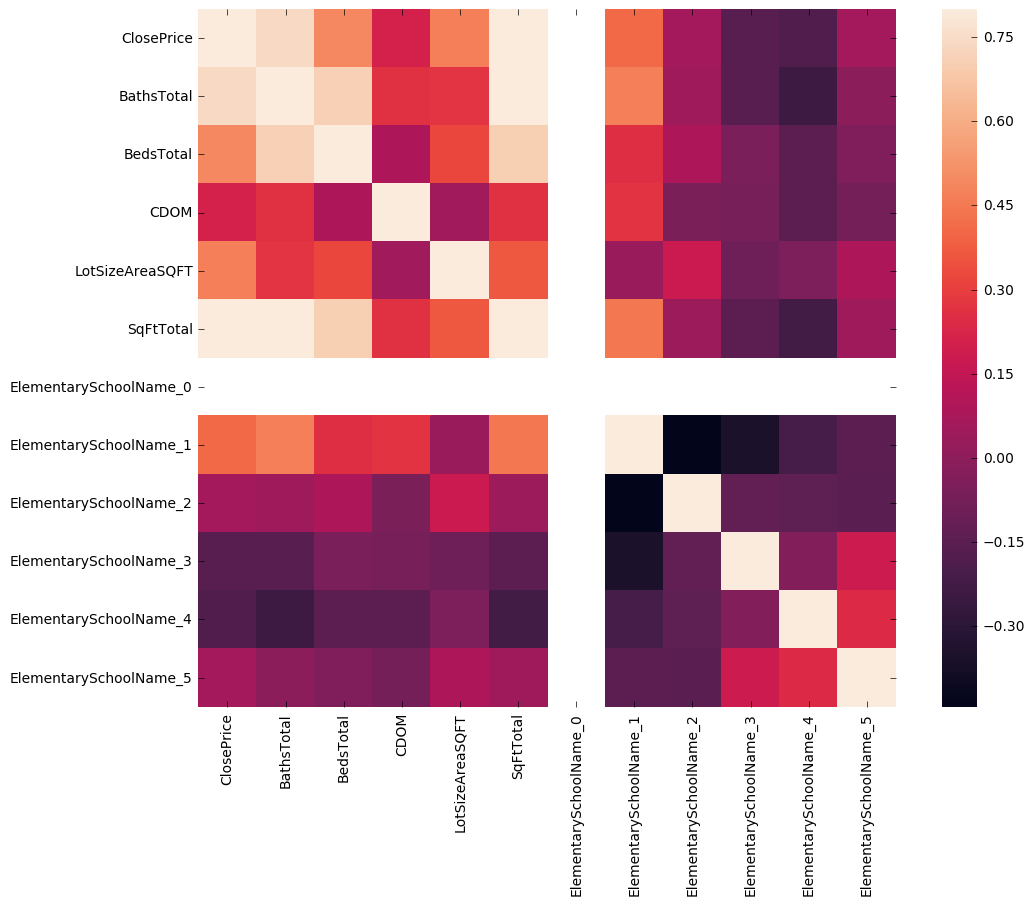

In [24]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

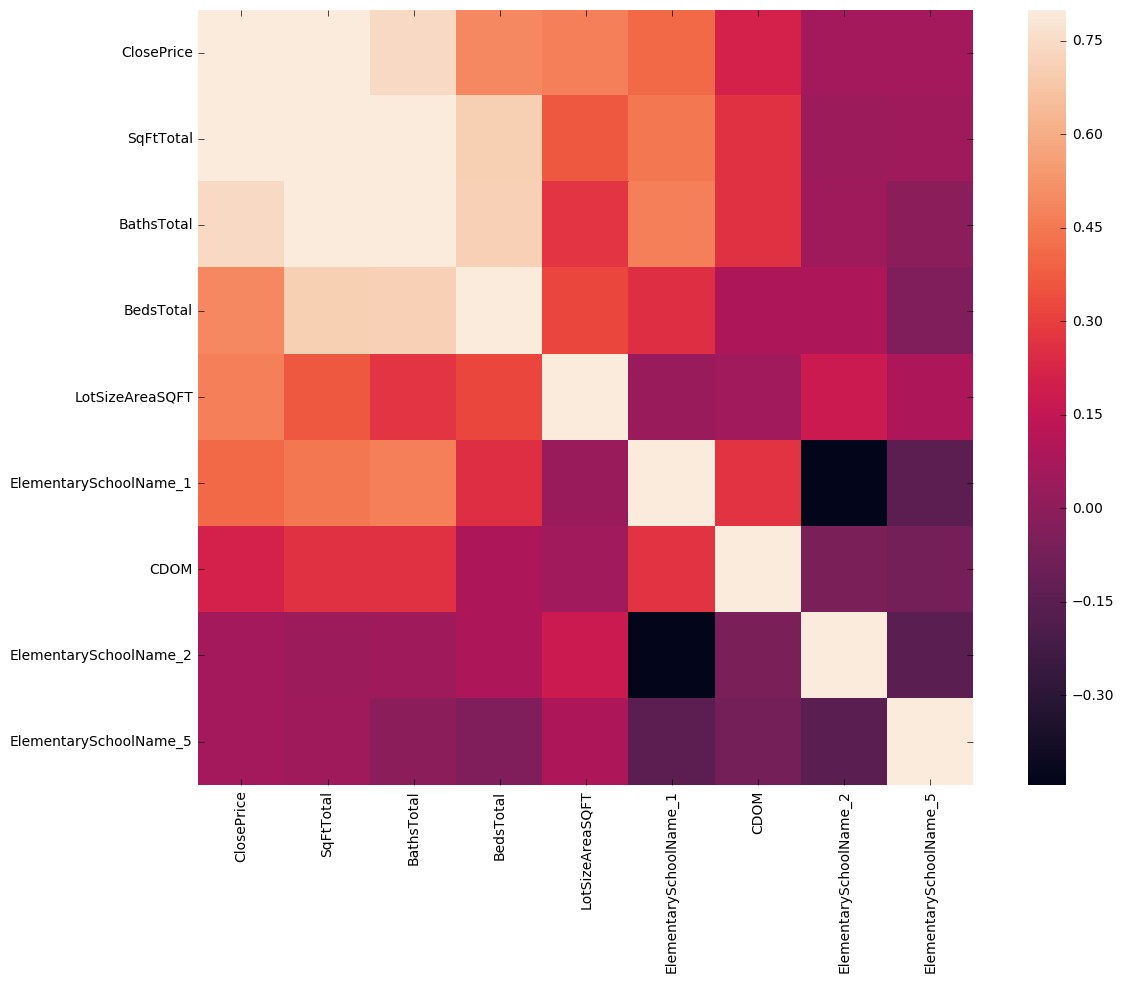

In [25]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ClosePrice')['ClosePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df1[cols].corr(), vmax=.8, square=True);

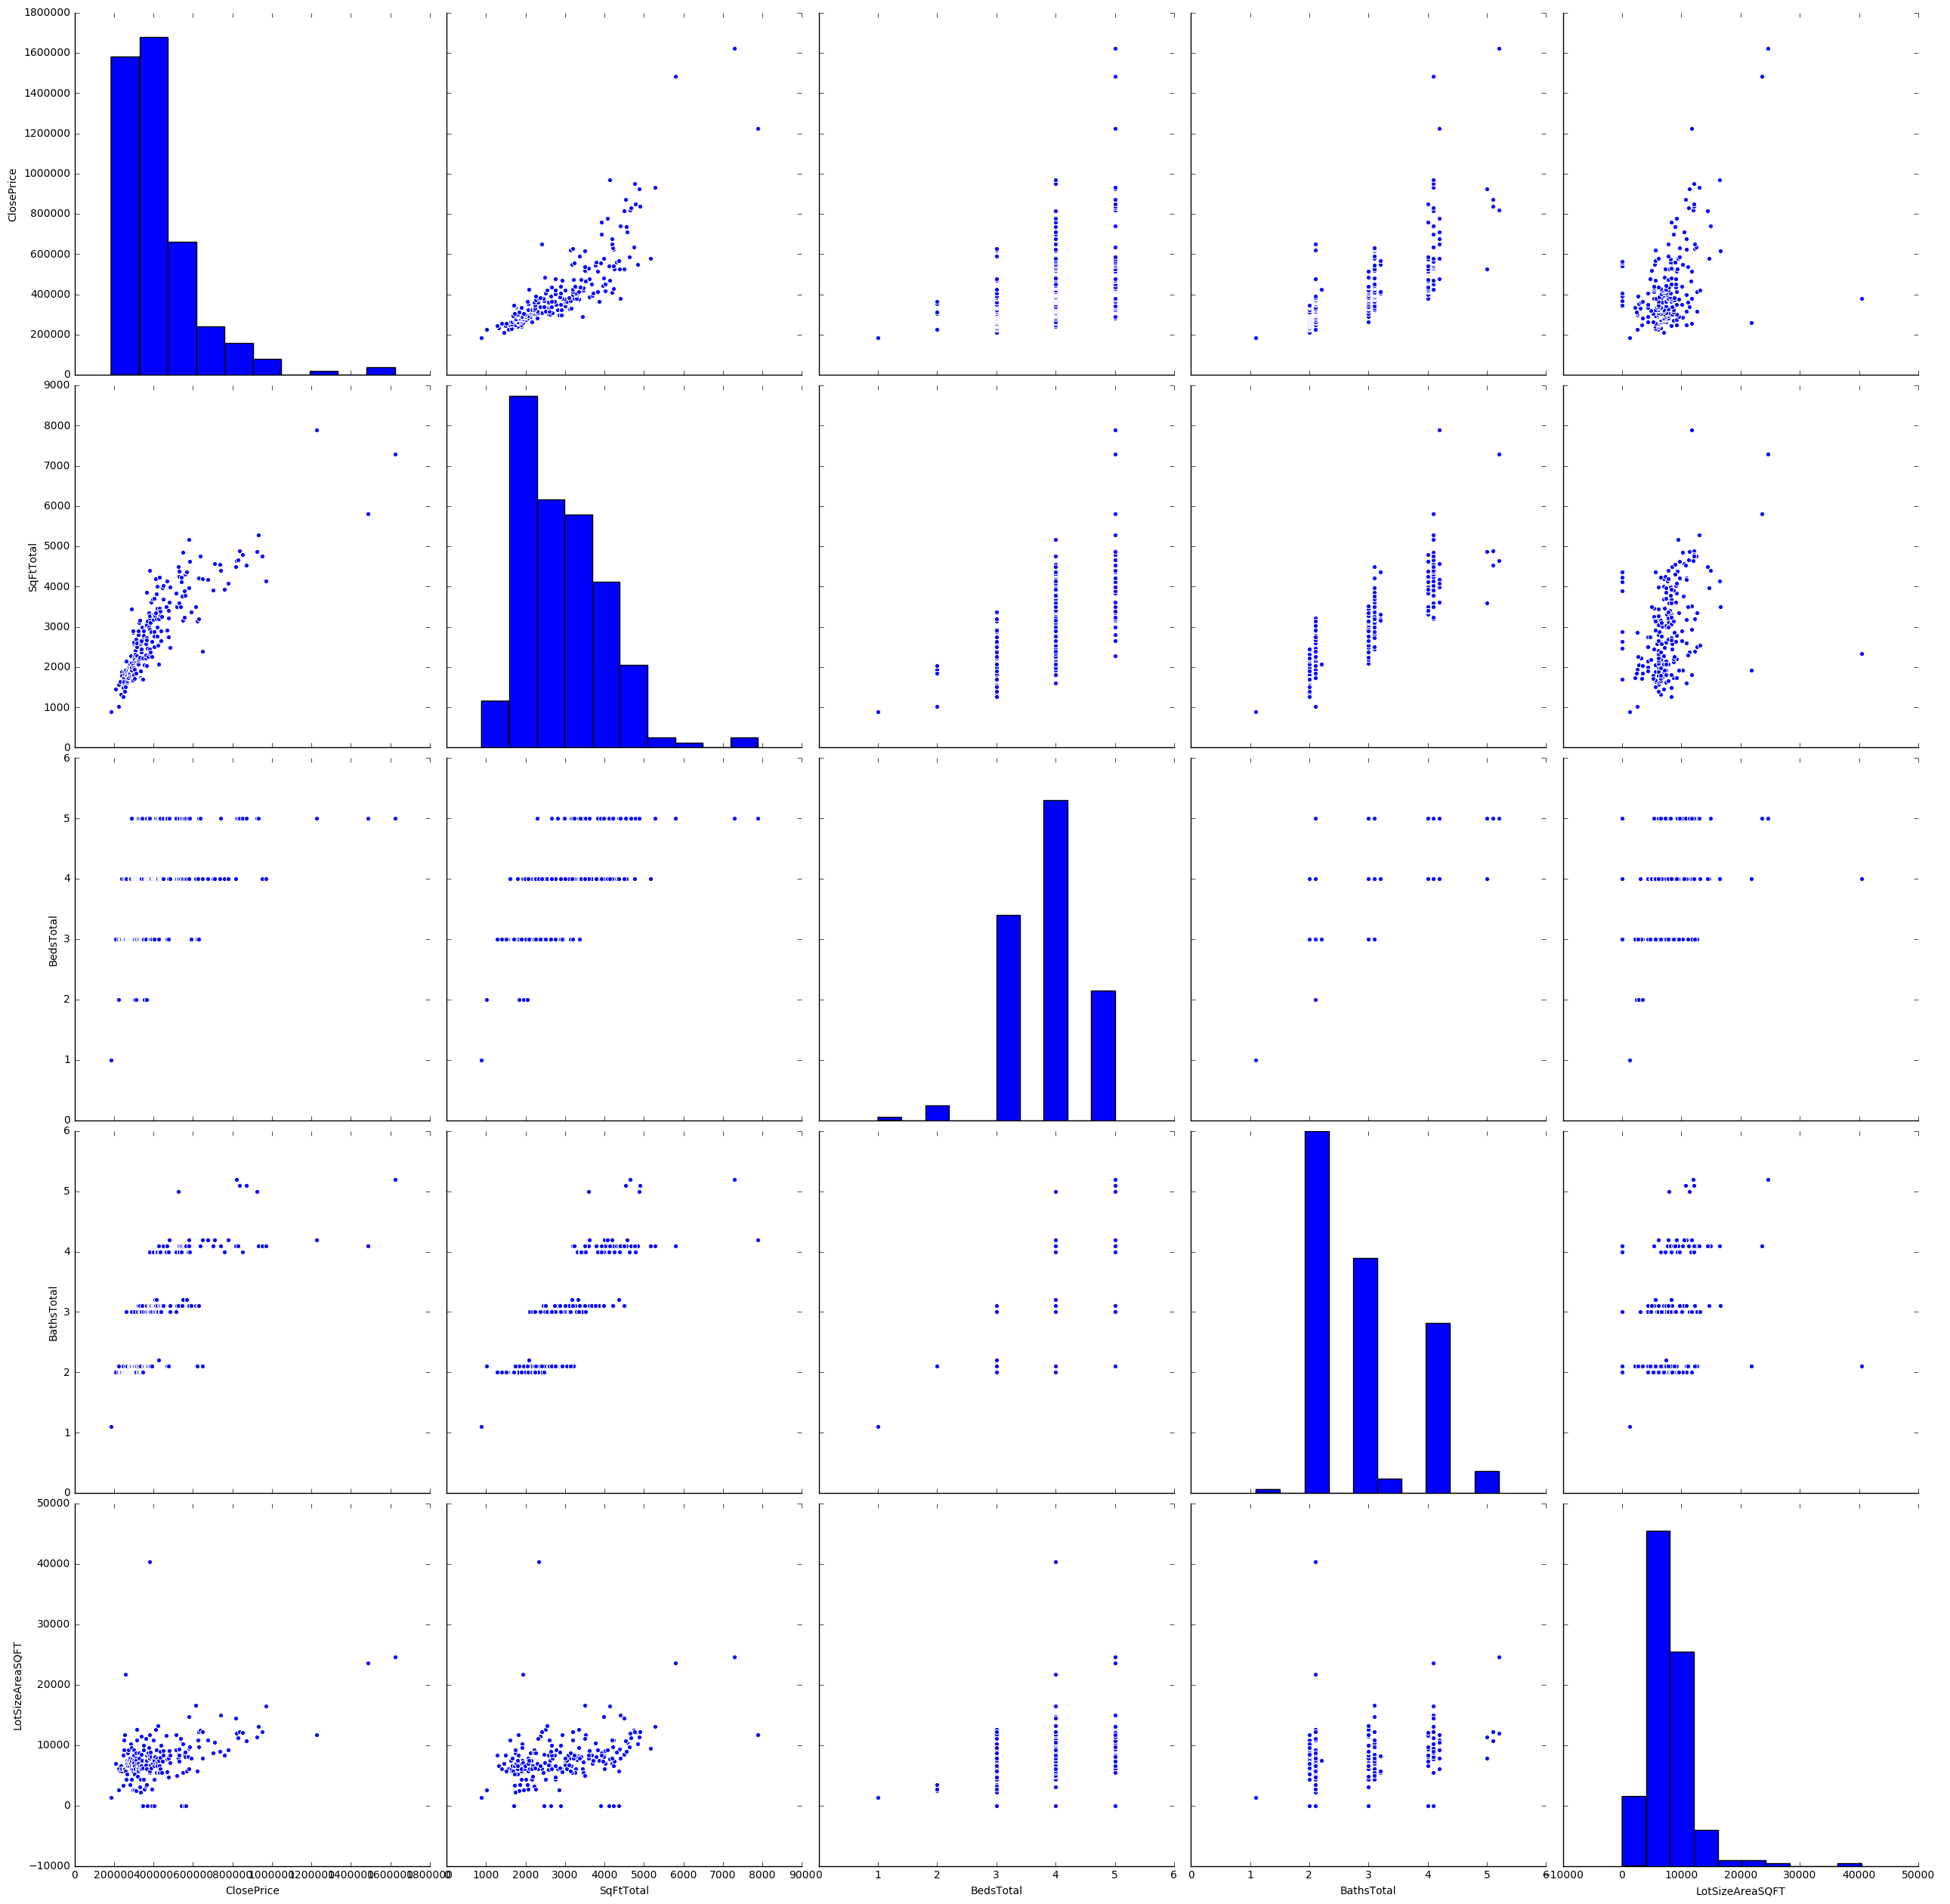

In [26]:
cols = ['ClosePrice', 'SqFtTotal', 'BedsTotal', 'BathsTotal','LotSizeAreaSQFT']
sns.pairplot(df1[cols], height = 5);

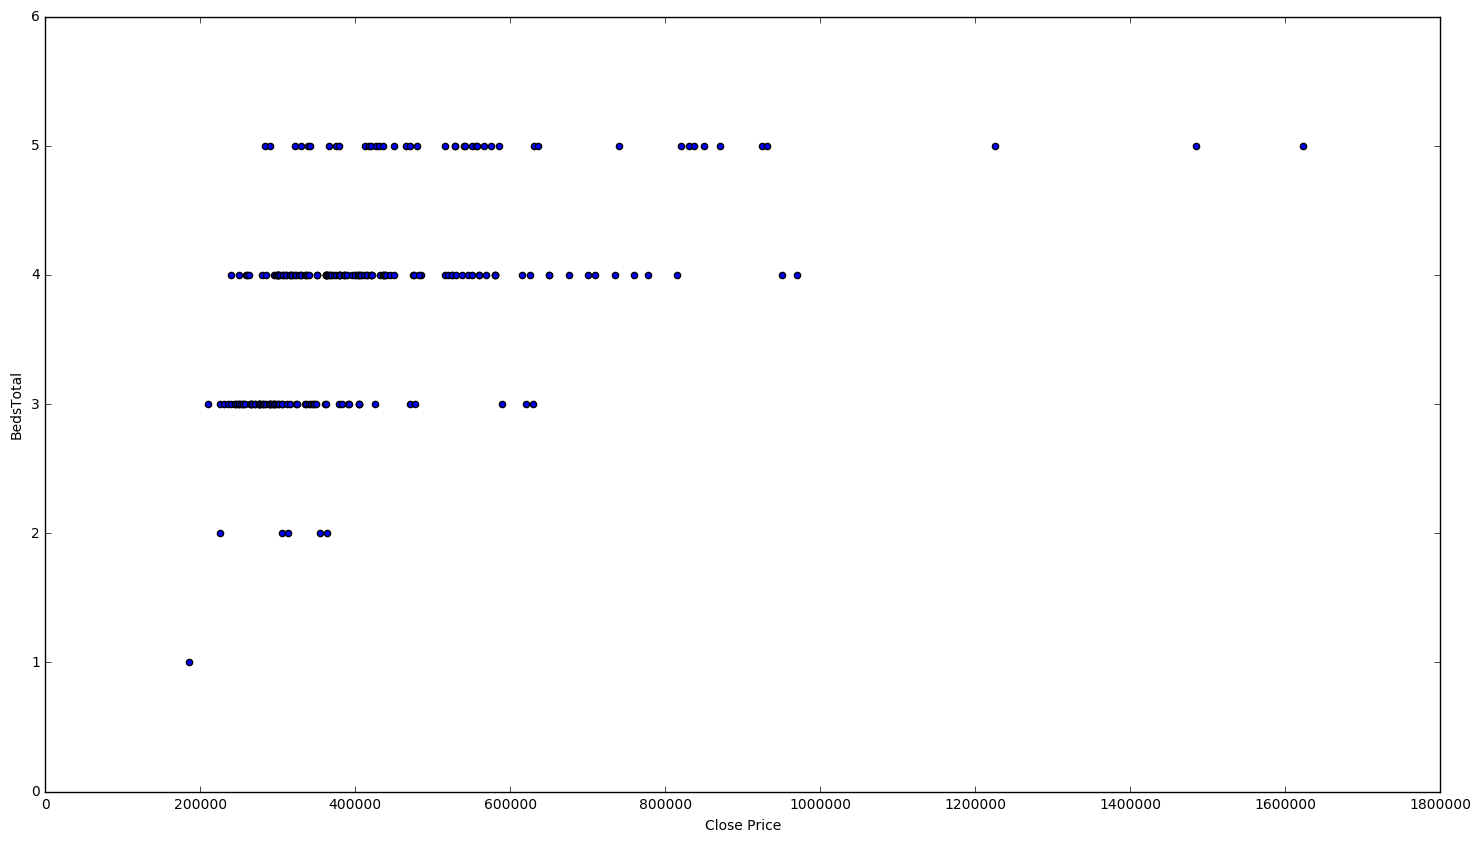

In [27]:
#handle outliers 
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['ClosePrice'], df1['BedsTotal'])
  
# x-axis label
ax.set_xlabel('Close Price')
  
# y-axis label
ax.set_ylabel('BedsTotal')
plt.show()

In [ ]:
# no real outliers 

In [29]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['BedsTotal']))
print(z)

[0.22021679 0.22021679 3.65675767 1.07210803 1.07210803 2.36443285
 1.07210803 1.07210803 1.07210803 0.22021679 1.07210803 1.07210803
 1.07210803 1.07210803 1.07210803 0.22021679 1.07210803 1.07210803
 1.07210803 1.07210803 0.22021679 0.22021679 0.22021679 1.07210803
 1.07210803 1.07210803 1.07210803 1.07210803 1.07210803 1.07210803
 1.07210803 1.07210803 1.07210803 1.07210803 0.22021679 1.07210803
 1.07210803 1.07210803 1.5125416  0.22021679 1.07210803 1.07210803
 1.07210803 1.5125416  1.07210803 1.07210803 1.07210803 0.22021679
 1.07210803 1.07210803 1.07210803 1.07210803 0.22021679 0.22021679
 0.22021679 0.22021679 0.22021679 1.07210803 0.22021679 1.07210803
 0.22021679 1.07210803 1.07210803 2.36443285 0.22021679 0.22021679
 0.22021679 0.22021679 1.07210803 2.36443285 1.07210803 0.22021679
 0.22021679 0.22021679 0.22021679 1.5125416  0.22021679 1.07210803
 0.22021679 1.07210803 0.22021679 0.22021679 1.5125416  0.22021679
 1.07210803 1.07210803 0.22021679 0.22021679 1.5125416  0.2202

In [30]:
threshold = 3
  
# Position of the outlier
print(np.where(z > 3))

(array([2]),)


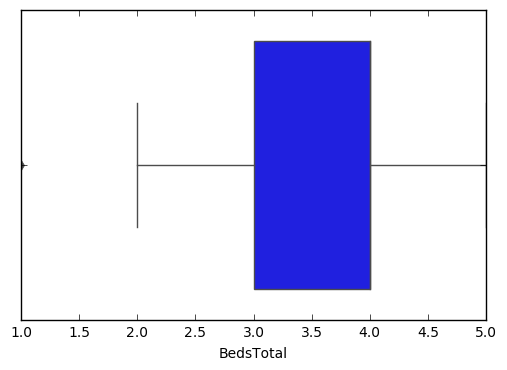

In [31]:
sns.boxplot(x=df1['BedsTotal'])

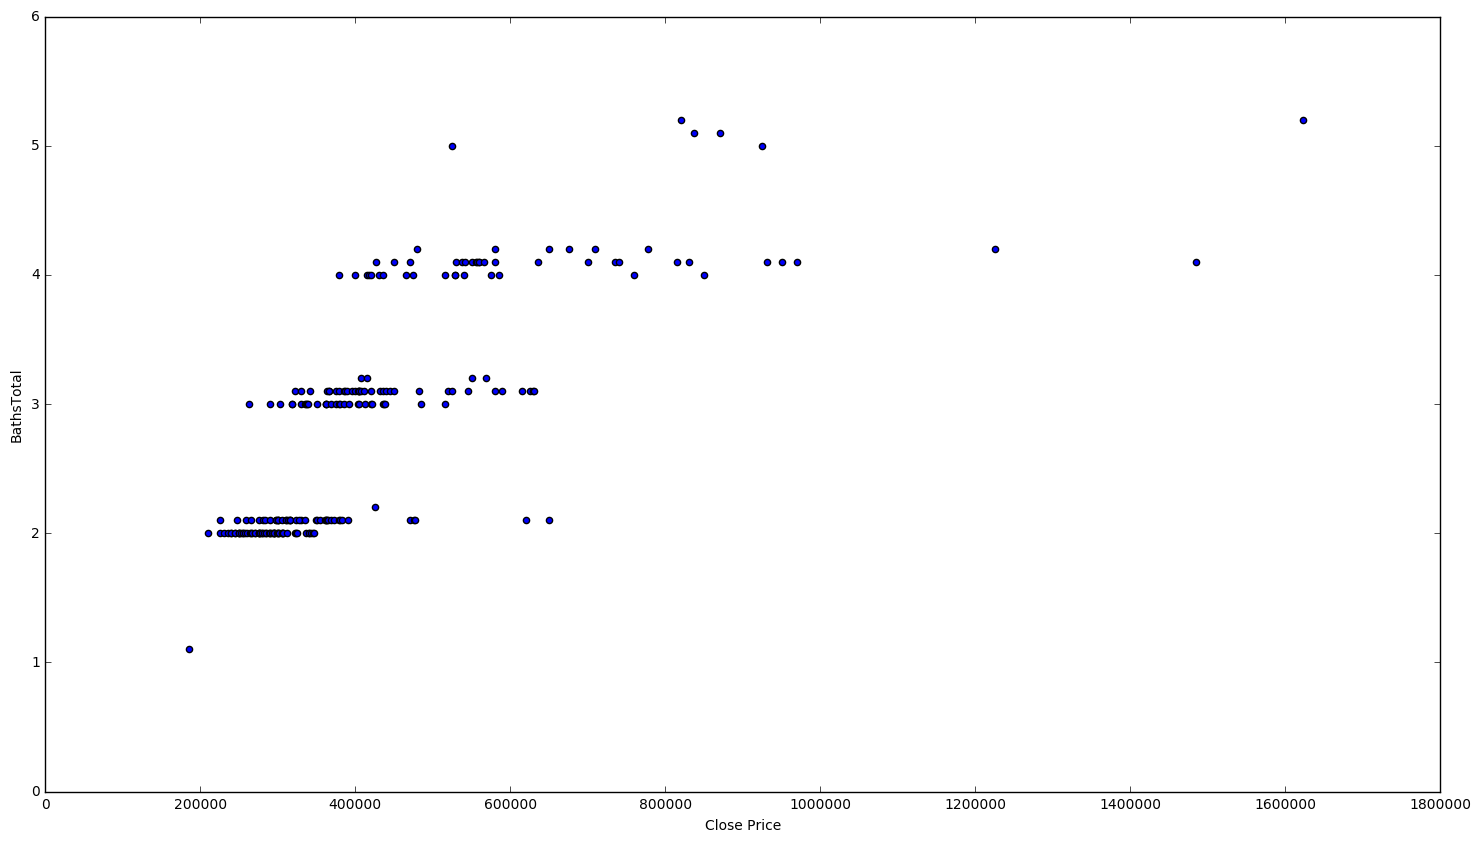

In [32]:
#handle outliers 
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['ClosePrice'], df1['BathsTotal'])
  
# x-axis label
ax.set_xlabel('Close Price')
  
# y-axis label
ax.set_ylabel('BathsTotal')
plt.show()

In [40]:
# Position of the Outlier
index_ls = list()
ls = list()
temp_ls = list()
arr1 = np.where((df1['ClosePrice']>1100000) & (df1['BathsTotal']>3.5)) 
#arr2= np.where((df1['ClosePrice']<600000) & (df1['LotSizeAreaSQFT']>20000))

#arrt = arr1+arr2
#total_ls = arr2.tolist()
ls = np.array(arr1).tolist()
print(ls)

[[220, 221, 222]]


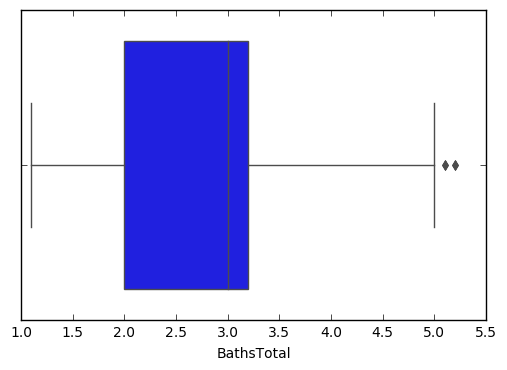

In [33]:
sns.boxplot(x=df1['BathsTotal'])

In [34]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['BathsTotal']))
print(z)

[0.1517115  0.87005016 2.00534089 0.98357923 0.98357923 0.87005016
 0.98357923 0.98357923 0.98357923 0.98357923 0.98357923 0.98357923
 0.87005016 0.98357923 0.98357923 0.98357923 0.98357923 0.98357923
 0.98357923 0.98357923 0.87005016 0.98357923 0.1517115  0.98357923
 0.87005016 0.98357923 0.98357923 0.98357923 0.98357923 0.98357923
 0.98357923 0.98357923 0.87005016 0.98357923 0.98357923 0.98357923
 0.87005016 0.98357923 0.87005016 0.98357923 0.98357923 0.98357923
 0.98357923 0.1517115  0.98357923 0.87005016 0.98357923 0.98357923
 0.98357923 0.98357923 0.98357923 0.87005016 0.87005016 0.98357923
 0.98357923 0.87005016 0.98357923 0.87005016 0.87005016 0.98357923
 0.1517115  0.98357923 0.98357923 0.87005016 0.98357923 0.98357923
 0.87005016 0.87005016 0.98357923 0.87005016 0.87005016 0.87005016
 0.87005016 0.1517115  0.1517115  0.26524057 0.98357923 0.98357923
 0.87005016 0.98357923 0.87005016 0.1517115  0.26524057 0.1517115
 0.87005016 0.98357923 0.1517115  0.1517115  0.1517115  0.98357

In [38]:
threshold = 3
  
# Position of the outlier
print(np.where(z > 3))

(array([], dtype=int64),)


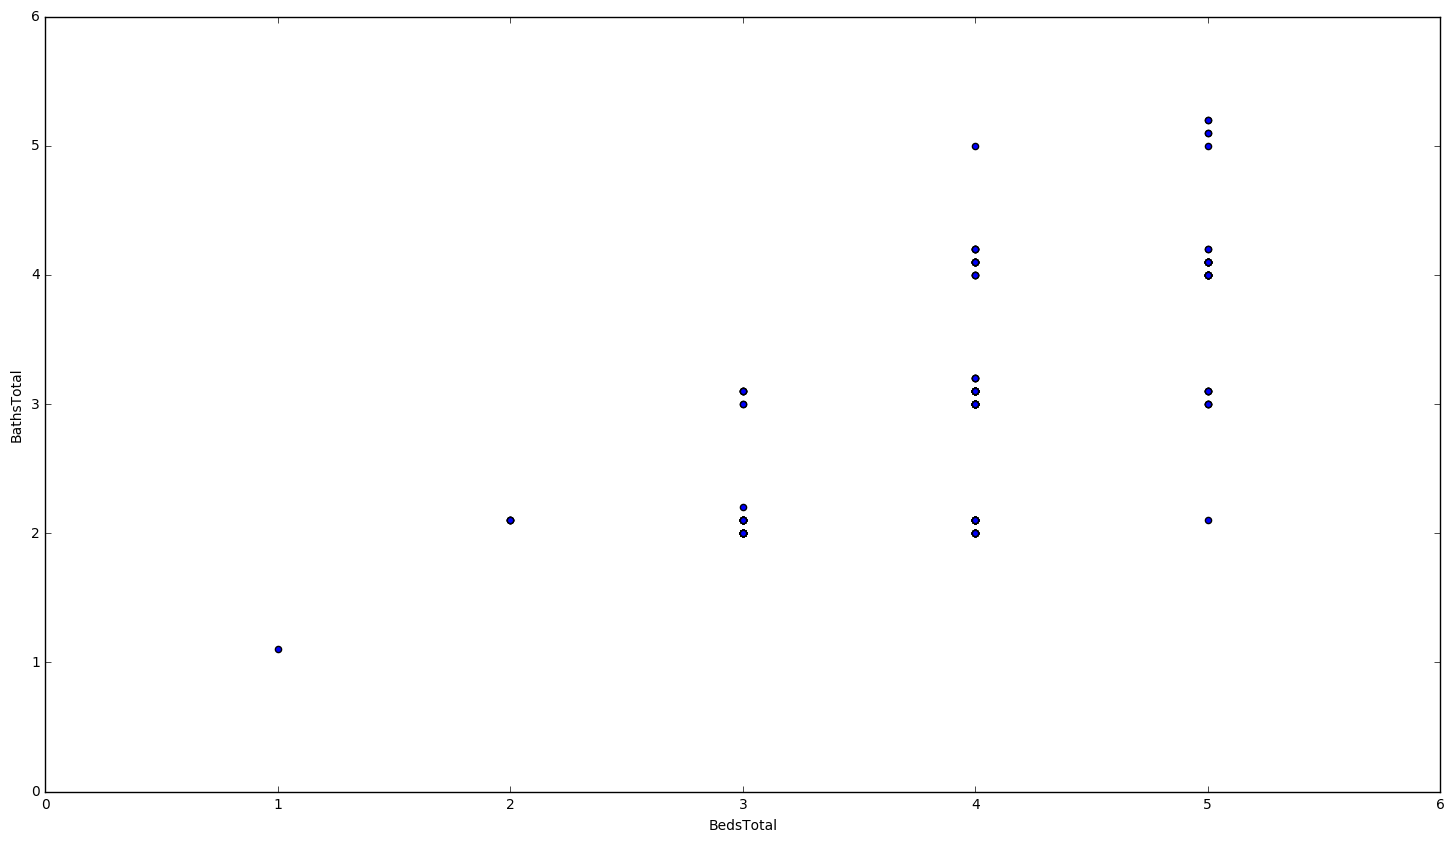

In [39]:
#handle outliers 
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df1['BedsTotal'], df1['BathsTotal'])
  
# x-axis label
ax.set_xlabel('BedsTotal')
  
# y-axis label
ax.set_ylabel('BathsTotal')
plt.show()

In [71]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(df1['SqFtTotal']))
print(z)

[4.14400245e-01 2.78592369e-01 1.89258121e+00 1.36875083e+00
 1.26897362e+00 1.77247901e+00 1.19414070e+00 1.48885303e+00
 9.69641970e-01 1.05001806e+00 1.33272017e+00 1.53504619e+00
 1.12207938e+00 9.69641970e-01 1.10452598e+00 1.22000887e+00
 1.19414070e+00 1.42418262e+00 1.03523625e+00 1.32070995e+00
 9.25296541e-01 1.05001806e+00 7.15579617e-01 1.21169410e+00
 1.05371351e+00 1.17566344e+00 9.69641970e-01 1.10452598e+00
 1.12115552e+00 9.69641970e-01 1.10544985e+00 9.36382899e-01
 8.57854535e-01 1.03985557e+00 9.24372678e-01 1.07865782e+00
 9.96434000e-01 7.96879570e-01 5.95477413e-01 8.66169303e-01
 9.36382899e-01 1.05648510e+00 9.36382899e-01 4.73432197e-01
 7.50686415e-01 8.57854535e-01 1.17566344e+00 8.02422749e-01
 1.15256686e+00 1.04539874e+00 1.02969307e+00 7.25708968e-02
 2.45300154e-02 8.66169303e-01 8.80027249e-01 6.65691009e-01
 1.04262716e+00 3.26633250e-01 2.95221905e-01 7.29437563e-01
 6.21345580e-01 6.89711450e-01 1.12669870e+00 9.13286321e-01
 4.87385430e-01 5.677615

In [72]:
threshold = 3
  
# Position of the outlier
#ls = list()
ls = np.where(z > 3)
print(ls)


(array([220, 222]),)


In [90]:
# define function called "outliers", which returns a lisy of index of outliers 
# IQR = Q3 - Q1
# +/- 1.5 * IQR
def outliers(df): #the dataframe and the feature
    
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [89]:
dfTest = df1

In [91]:
dfx = outliers(dfTest)

In [92]:
dfx

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4.0,52.0,7100.28,2484.0,Allen,0,0,0,0,0,1
431,330000.0,2.1,4.0,58.0,8712.00,2631.0,Fisher,0,0,0,0,1,0
432,185000.0,1.1,NaN,38.0,NaN,884.0,Bright,0,0,0,0,1,1
433,210000.0,2.0,3.0,11.0,6969.60,1451.0,Shawnee,0,0,0,1,0,0
434,225000.0,2.0,3.0,89.0,6098.40,1559.0,Bright,0,0,0,0,1,1
435,225000.0,2.1,2.0,10.0,2613.60,1014.0,Bright,0,0,0,0,1,1
436,231000.0,2.0,3.0,43.0,5662.80,1640.0,Tadlock,0,0,0,1,0,1
437,235000.0,2.0,3.0,107.0,6534.00,1321.0,Christie,0,0,0,1,1,0
438,240000.0,2.0,3.0,90.0,5662.80,1883.0,Tadlock,0,0,0,1,0,1
439,240000.0,2.0,4.0,9.0,6098.40,1796.0,Gunstream,0,0,0,1,1,1


In [96]:
dfx.isnull().sum()

ClosePrice                15
BathsTotal                 4
BedsTotal                  1
CDOM                       8
LotSizeAreaSQFT           20
SqFtTotal                  2
ElementarySchoolName       0
ElementarySchoolName_0     0
ElementarySchoolName_1     0
ElementarySchoolName_2     0
ElementarySchoolName_3     0
ElementarySchoolName_4     0
ElementarySchoolName_5     0
dtype: int64

In [93]:
df1

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,Allen,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,Fisher,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,Bright,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,Shawnee,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,Bright,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,Bright,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,Tadlock,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,Christie,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,Tadlock,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,Gunstream,0,0,0,1,1,1


In [88]:
# create an empty list to store the output indices from multiple coulmns

index_list = []

# extract outliers
for feature in ['SqFtTotal', 'LotSizeAreaSQFT']:
    # want to save the output indexes in the same list, using the python extend function
    index_list.extend(outliers(df1, feature))

In [ ]:
#define a function called "remove" which returns a clenead datatfremae without the outliers 
# parameters: dtaat frame and index list
def remove(df, ls):
    ls = sorted(set(ls))  # index list might not be unquie
    df = df.drop(ls)
    
    return df

In [ ]:
df_cleaned = remove(df1, ls)

In [97]:
dfRemove = df1


In [106]:
dfRemove

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,Allen,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,Fisher,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,Bright,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,Shawnee,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,Bright,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,Bright,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,Tadlock,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,Christie,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,Tadlock,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,Gunstream,0,0,0,1,1,1


In [114]:
sns.histplot(dfRemove)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

In [115]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.2, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.histplot(df[col], kde=False, bins = 50,color="r")
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [116]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = df["Data_zscore"]
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

AttributeError: module 'seaborn' has no attribute 'histplot'

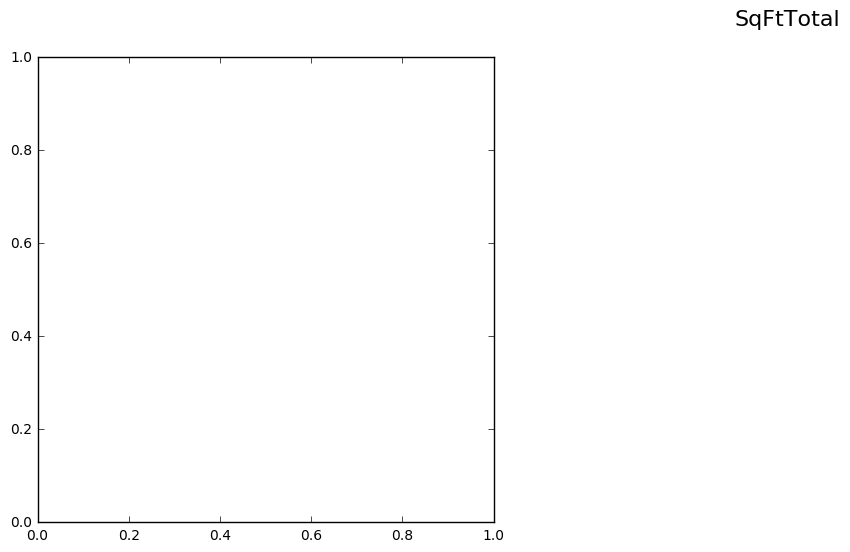

In [118]:
outlier_inspect(dfRemove,"SqFtTotal")

In [119]:
dfRemove[(np.abs(stats.zscore(dfRemove)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [128]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(dfRemove))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
dfdataclean = dfRemove[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
dfdataclean.shape

/Users/ezi/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/ezi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


(0, 12)

In [125]:
dfRemove.dtypes

ClosePrice                float64
BathsTotal                float64
BedsTotal                   int64
CDOM                        int64
LotSizeAreaSQFT           float64
SqFtTotal                   int64
ElementarySchoolName       object
ElementarySchoolName_0      int64
ElementarySchoolName_1      int64
ElementarySchoolName_2      int64
ElementarySchoolName_3      int64
ElementarySchoolName_4      int64
ElementarySchoolName_5      int64
dtype: object

In [126]:
dfRemove = dfRemove.drop("ElementarySchoolName", axis=1)

In [130]:
dfRemove.shape

(223, 12)

In [141]:
dfTester = df1

In [142]:
dfTester = dfTester.drop("ElementarySchoolName", axis=1)

In [143]:
dfTester.drop(dfTester.index[220])

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [156]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(dfTester['SqFtTotal']))
print(z)

[4.14400245e-01 2.78592369e-01 1.89258121e+00 1.36875083e+00
 1.26897362e+00 1.77247901e+00 1.19414070e+00 1.48885303e+00
 9.69641970e-01 1.05001806e+00 1.33272017e+00 1.53504619e+00
 1.12207938e+00 9.69641970e-01 1.10452598e+00 1.22000887e+00
 1.19414070e+00 1.42418262e+00 1.03523625e+00 1.32070995e+00
 9.25296541e-01 1.05001806e+00 7.15579617e-01 1.21169410e+00
 1.05371351e+00 1.17566344e+00 9.69641970e-01 1.10452598e+00
 1.12115552e+00 9.69641970e-01 1.10544985e+00 9.36382899e-01
 8.57854535e-01 1.03985557e+00 9.24372678e-01 1.07865782e+00
 9.96434000e-01 7.96879570e-01 5.95477413e-01 8.66169303e-01
 9.36382899e-01 1.05648510e+00 9.36382899e-01 4.73432197e-01
 7.50686415e-01 8.57854535e-01 1.17566344e+00 8.02422749e-01
 1.15256686e+00 1.04539874e+00 1.02969307e+00 7.25708968e-02
 2.45300154e-02 8.66169303e-01 8.80027249e-01 6.65691009e-01
 1.04262716e+00 3.26633250e-01 2.95221905e-01 7.29437563e-01
 6.21345580e-01 6.89711450e-01 1.12669870e+00 9.13286321e-01
 4.87385430e-01 5.677615

In [157]:
threshold = 3
  
# Position of the outlier
#ls = list()
ls = np.where(z > 3)

print(ls)



(array([220, 222]),)


In [155]:
dfTester.drop([dfTester.index[220] , dfTester.index[222]])

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [167]:
dfTester.index

Int64Index([430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
            ...
            643, 644, 645, 646, 647, 648, 649, 650, 651, 652],
           dtype='int64', length=223)

In [168]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(dfTester['SqFtTotal']))
print(z)

[4.14400245e-01 2.78592369e-01 1.89258121e+00 1.36875083e+00
 1.26897362e+00 1.77247901e+00 1.19414070e+00 1.48885303e+00
 9.69641970e-01 1.05001806e+00 1.33272017e+00 1.53504619e+00
 1.12207938e+00 9.69641970e-01 1.10452598e+00 1.22000887e+00
 1.19414070e+00 1.42418262e+00 1.03523625e+00 1.32070995e+00
 9.25296541e-01 1.05001806e+00 7.15579617e-01 1.21169410e+00
 1.05371351e+00 1.17566344e+00 9.69641970e-01 1.10452598e+00
 1.12115552e+00 9.69641970e-01 1.10544985e+00 9.36382899e-01
 8.57854535e-01 1.03985557e+00 9.24372678e-01 1.07865782e+00
 9.96434000e-01 7.96879570e-01 5.95477413e-01 8.66169303e-01
 9.36382899e-01 1.05648510e+00 9.36382899e-01 4.73432197e-01
 7.50686415e-01 8.57854535e-01 1.17566344e+00 8.02422749e-01
 1.15256686e+00 1.04539874e+00 1.02969307e+00 7.25708968e-02
 2.45300154e-02 8.66169303e-01 8.80027249e-01 6.65691009e-01
 1.04262716e+00 3.26633250e-01 2.95221905e-01 7.29437563e-01
 6.21345580e-01 6.89711450e-01 1.12669870e+00 9.13286321e-01
 4.87385430e-01 5.677615

In [169]:
threshold = 3
  
# Position of the outlier
#ls = list()
ls = np.where(z > 3)

print(ls)

(array([220, 222]),)


In [181]:
dfTester = df1


In [182]:
 dfTester

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
430,485000.0,3.0,4,52,7100.28,2484,Allen,0,0,0,0,0,1,0,0,0,0,0,1
431,330000.0,2.1,4,58,8712.00,2631,Fisher,0,0,0,0,1,0,0,0,0,0,1,0
432,185000.0,1.1,1,38,1306.80,884,Bright,0,0,0,0,1,1,0,0,0,0,1,1
433,210000.0,2.0,3,11,6969.60,1451,Shawnee,0,0,0,1,0,0,0,0,0,1,0,0
434,225000.0,2.0,3,89,6098.40,1559,Bright,0,0,0,0,1,1,0,0,0,0,1,1
435,225000.0,2.1,2,10,2613.60,1014,Bright,0,0,0,0,1,1,0,0,0,0,1,1
436,231000.0,2.0,3,43,5662.80,1640,Tadlock,0,0,0,1,0,1,0,0,0,1,0,1
437,235000.0,2.0,3,107,6534.00,1321,Christie,0,0,0,1,1,0,0,0,0,1,1,0
438,240000.0,2.0,3,90,5662.80,1883,Tadlock,0,0,0,1,0,1,0,0,0,1,0,1
439,240000.0,2.0,4,9,6098.40,1796,Gunstream,0,0,0,1,1,1,0,0,0,1,1,1


In [183]:
dfTester = dfTester.reset_index()

In [184]:
dfTester

,index,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,430,485000.0,3.0,4,52,7100.28,2484,Allen,0,0,0,0,0,1,0,0,0,0,0,1
1,431,330000.0,2.1,4,58,8712.00,2631,Fisher,0,0,0,0,1,0,0,0,0,0,1,0
2,432,185000.0,1.1,1,38,1306.80,884,Bright,0,0,0,0,1,1,0,0,0,0,1,1
3,433,210000.0,2.0,3,11,6969.60,1451,Shawnee,0,0,0,1,0,0,0,0,0,1,0,0
4,434,225000.0,2.0,3,89,6098.40,1559,Bright,0,0,0,0,1,1,0,0,0,0,1,1
5,435,225000.0,2.1,2,10,2613.60,1014,Bright,0,0,0,0,1,1,0,0,0,0,1,1
6,436,231000.0,2.0,3,43,5662.80,1640,Tadlock,0,0,0,1,0,1,0,0,0,1,0,1
7,437,235000.0,2.0,3,107,6534.00,1321,Christie,0,0,0,1,1,0,0,0,0,1,1,0
8,438,240000.0,2.0,3,90,5662.80,1883,Tadlock,0,0,0,1,0,1,0,0,0,1,0,1
9,439,240000.0,2.0,4,9,6098.40,1796,Gunstream,0,0,0,1,1,1,0,0,0,1,1,1


In [186]:
dfTester = dfTester.drop("ElementarySchoolName", axis=1)

In [187]:
dfTester

,index,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,430,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,431,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
2,432,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
3,433,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,434,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,435,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,436,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,437,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,438,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,439,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [188]:
dfTester = dfTester.drop("index", axis=1)

In [189]:
dfTester

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
2,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
3,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [190]:
dfTester.index

RangeIndex(start=0, stop=223, step=1)

In [195]:
dfTester = dfTester.drop([dfTester.index[220] , dfTester.index[222]])

IndexError: index 222 is out of bounds for axis 0 with size 221

In [196]:
dfTester

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
2,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
3,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [198]:
dfTester.shape

(221, 18)

In [203]:
dfTester = dfTester.reset_index()

In [204]:
dfTester

,level_0,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,0,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,1,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
2,2,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
3,3,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,4,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,5,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,6,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,7,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,8,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,9,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [206]:
dfTester = dfTester.drop("level_0", axis=1)

In [207]:
dfTester

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
2,185000.0,1.1,1,38,1306.80,884,0,0,0,0,1,1,0,0,0,0,1,1
3,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1


In [233]:
# Z score
from scipy import stats
  
z = np.abs(stats.zscore(dfTester['BedsTotal']))
print(z)

[0.23530226 0.23530226 3.6648327  1.06474273 1.06474273 2.36478771
 1.06474273 1.06474273 1.06474273 0.23530226 1.06474273 1.06474273
 1.06474273 1.06474273 1.06474273 0.23530226 1.06474273 1.06474273
 1.06474273 1.06474273 0.23530226 0.23530226 0.23530226 1.06474273
 1.06474273 1.06474273 1.06474273 1.06474273 1.06474273 1.06474273
 1.06474273 1.06474273 1.06474273 1.06474273 0.23530226 1.06474273
 1.06474273 1.06474273 1.53534724 0.23530226 1.06474273 1.06474273
 1.06474273 1.53534724 1.06474273 1.06474273 1.06474273 0.23530226
 1.06474273 1.06474273 1.06474273 1.06474273 0.23530226 0.23530226
 0.23530226 0.23530226 0.23530226 1.06474273 0.23530226 1.06474273
 0.23530226 1.06474273 1.06474273 2.36478771 0.23530226 0.23530226
 0.23530226 0.23530226 1.06474273 2.36478771 1.06474273 0.23530226
 0.23530226 0.23530226 0.23530226 1.53534724 0.23530226 1.06474273
 0.23530226 1.06474273 0.23530226 0.23530226 1.53534724 0.23530226
 1.06474273 1.06474273 0.23530226 0.23530226 1.53534724 0.2353

In [234]:
threshold = 3
  
# Position of the outlier
#ls = list()
ls = np.where(z > 3)

print(ls)

(array([2]),)


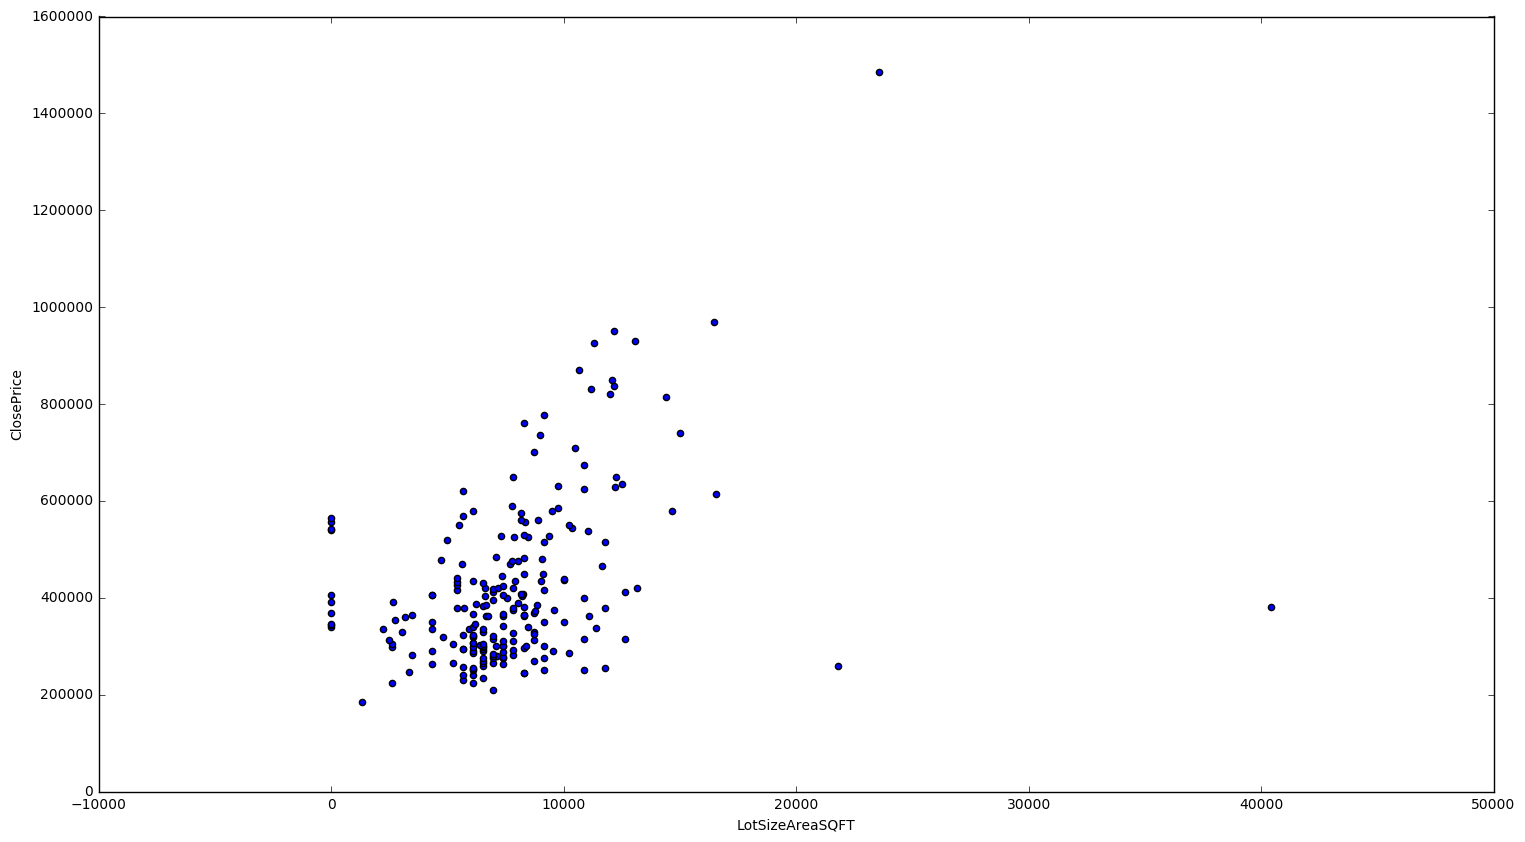

In [230]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfTester['LotSizeAreaSQFT'], dfTester['ClosePrice'])
  
# x-axis label
ax.set_xlabel('LotSizeAreaSQFT')
  
# y-axis label
ax.set_ylabel('ClosePrice')
plt.show()

In [225]:
# Position of the Outlier
print(np.where((dfTester['LotSizeAreaSQFT']<30000) & (dfTester['LotSizeAreaSQFT']>30000)))

(array([120]),)


In [236]:
dfTester = dfTester.drop([dfTester.index[220] , dfTester.index[120],dfTester.index[20],dfTester.index[2]])

In [237]:
dfTester

,ClosePrice,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5,ElementarySchoolName_0,ElementarySchoolName_1,ElementarySchoolName_2,ElementarySchoolName_3,ElementarySchoolName_4,ElementarySchoolName_5
0,485000.0,3.0,4,52,7100.28,2484,0,0,0,0,0,1,0,0,0,0,0,1
1,330000.0,2.1,4,58,8712.00,2631,0,0,0,0,1,0,0,0,0,0,1,0
3,210000.0,2.0,3,11,6969.60,1451,0,0,0,1,0,0,0,0,0,1,0,0
4,225000.0,2.0,3,89,6098.40,1559,0,0,0,0,1,1,0,0,0,0,1,1
5,225000.0,2.1,2,10,2613.60,1014,0,0,0,0,1,1,0,0,0,0,1,1
6,231000.0,2.0,3,43,5662.80,1640,0,0,0,1,0,1,0,0,0,1,0,1
7,235000.0,2.0,3,107,6534.00,1321,0,0,0,1,1,0,0,0,0,1,1,0
8,240000.0,2.0,3,90,5662.80,1883,0,0,0,1,0,1,0,0,0,1,0,1
9,240000.0,2.0,4,9,6098.40,1796,0,0,0,1,1,1,0,0,0,1,1,1
10,245000.0,2.0,3,17,8276.40,1490,0,0,0,0,1,1,0,0,0,0,1,1


In [ ]:
#'ClosePrice', 'SqFtTotal', 'BedsTotal', 'BathsTotal','LotSizeAreaSQFT'

 #   218,219,220,221,222                            2                       20,120,220
    


# Note: must reset index values after after you split the data set

## Functions needed: 1.) Reset Dataset, 2.) Drop Columns 3.)Drop index values
as when you call np.where --> to find index of outliers,it will read and return outlier positions, readign the daat frame indexes 0-x. It'll be hard to find and delete the outliers